In [1]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
df = pandas.read_csv("datasets - Million Live_v2.csv")
df.head()

,game,ranking_idol,event_type,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,mltd,amami haruka,anniv,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,mltd,kisaragi chihaya,anniv,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,mltd,hoshi miki,anniv,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,mltd,hagiwara yukiho,anniv,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,mltd,takatsuki yayoi,anniv,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [3]:
#One hot encoding
#Encode game
game = df['game']
game_dummy = pandas.get_dummies(game,prefix='game')
game_dummy.head()

,game_mltd
0,1
1,1
2,1
3,1
4,1


In [4]:
#Encode Idols
idol = df['ranking_idol']
idol_dummy = pandas.get_dummies(idol,prefix='idol')
idol_dummy.head()

,idol_akizuki ritsuko,idol_amami haruka,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,idol_handa roco,...,idol_suou momoko,idol_takatsuki yayoi,idol_takayama sayoko,idol_tanaka kotoha,idol_tenkubashi tomoka,idol_tokoro megumi,idol_tokugawa matsuri,idol_toyokawa fuuka,idol_yabuki kana,idol_yokoyama nao
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
#Encode Event Types
event_type = df['event_type']
event_type_dummy = pandas.get_dummies(event_type,prefix='event_type')
event_type_dummy.head()

,event_type_anniv,event_type_theater,event_type_tour
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [6]:
#Drop Data
df.drop(['game'],axis=1,inplace=True)
df.drop(['ranking_idol'],axis=1,inplace=True)
df.drop(['event_type'],axis=1,inplace=True)
df.head()

,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [7]:
#Concat Data
df = pandas.concat([game_dummy,idol_dummy,event_type_dummy,df],axis=1)
df.head()

,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,...,event_type_tour,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,1,0,1,0,0,0,0,0,0,0,...,0,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,1,0,0,0,0,0,0,0,1,0,...,0,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [8]:
df.shape

(90, 65)

In [9]:
#Zscoring
df['t1_zscore'] = (df['t1_cutoff'] - df['t1_cutoff'].mean())/df['t1_cutoff'].std()   
df.head()
df.shape

(90, 66)

In [18]:
#Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:59]
Y = dataset[:,65]
X_train = dataset[:65,0:59]
X_test = dataset[65:,0:59]
Y_train = dataset[:65,65]
Y_test = dataset[65:,65]

In [19]:
#Predict
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [23]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=final_model(), epochs=100, batch_size=5, verbose=0)

In [110]:
def final_model():
    # create model
    model = Sequential()
    model.add(Dense(59, input_dim=59, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')    
    return model

In [125]:
model = final_model()
model.fit(X_train, Y_train, epochs=3000,batch_size=5,verbose=0)
#1k/10 : -0.28/0.12
#2k/10 : -0.34/0.15 but visually better,maybe need to change to MSE (?)
#1k/5 : -0.34/0.15 visually worse than ^
#2k/5 : -0.29/0.12 visually better than all of the above
#2k/5,59/1/1 : -0.27/0.09 visually slightly better than all of the above
#500/5,59 : -0.25/0.12 visually same
#3k/5 : -0.23/0.11 some are better, some worse (most likely overfit)

In [126]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_test, Y_test, cv=kfold)
print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Final: -0.23 (0.11) MAE


In [127]:
X = X_test
Y = Y_test
Y_reg = df.iloc[65:,59]

In [128]:
ynew = model.predict(X)
indexes = [0]*len(X)
for i in range(len(X)):
    print("Actual=%s, Predicted=%s" % (Y[i], ynew[i]))
    indexes[i] = i

Actual=-1.1339069232958952, Predicted=[-0.97095984]
Actual=-0.6525487616577403, Predicted=[-0.46804774]
Actual=-0.5812074495423479, Predicted=[0.02889485]
Actual=-1.2396522307020967, Predicted=[-1.3304535]
Actual=-0.5813179862789062, Predicted=[-0.6855308]
Actual=-1.094939339881467, Predicted=[-1.1568633]
Actual=-1.0050977874290523, Predicted=[-0.9392614]
Actual=-1.0344441630593808, Predicted=[-0.9421376]
Actual=-1.143401803381071, Predicted=[-1.1489518]
Actual=-0.8485055812060619, Predicted=[-0.85525125]
Actual=-0.8162762270181533, Predicted=[-1.0672895]
Actual=-0.6970364143447807, Predicted=[-0.85421336]
Actual=-0.9093774852731527, Predicted=[-0.8777924]
Actual=0.36601342794991004, Predicted=[0.10792062]
Actual=-1.1558992221674511, Predicted=[-1.314328]
Actual=-0.6852721473825112, Predicted=[-0.9143854]
Actual=-1.0239950576769778, Predicted=[-1.1229764]
Actual=-1.0154521470372626, Predicted=[-1.0663565]
Actual=-0.8251417244604771, Predicted=[-0.7872875]
Actual=-0.7051777833700598, Pr

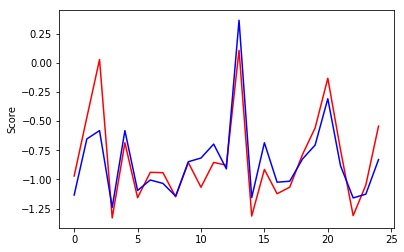

In [129]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes,ynew,color='red')
plt.plot(indexes,Y,color='blue')
plt.ylabel('Score')
plt.show()

In [97]:
#This part is probably still very broken
#Visualize regularized
Y_reg = df.iloc[65:,59]
indexes = [0]*len(X)
y_pred_normalized = [0]*len(X)
for i in range(len(X)):
    res = (ynew[i]*Y_reg.std())+Y_reg.mean()
    print("Actual=%s, Predicted=%s" % (Y_reg[i+65], res))
    indexes[i] = i
    y_pred_normalized[i] = res

Actual=149580, Predicted=[117463.5]
Actual=362962, Predicted=[148639.1]
Actual=394587, Predicted=[193826.78]
Actual=102704, Predicted=[64654.78]
Actual=394538, Predicted=[156313.83]
Actual=166854, Predicted=[91395.86]
Actual=206680, Predicted=[122371.234]
Actual=193671, Predicted=[123856.234]
Actual=145371, Predicted=[94190.14]
Actual=276096, Predicted=[137591.23]
Actual=290383, Predicted=[105610.41]
Actual=343241, Predicted=[138036.11]
Actual=249112, Predicted=[134804.81]
Actual=814482, Predicted=[186732.42]
Actual=139831, Predicted=[65885.78]
Actual=348456, Predicted=[129064.36]
Actual=198303, Predicted=[97452.875]
Actual=202090, Predicted=[103037.125]
Actual=286453, Predicted=[142377.25]
Actual=339632, Predicted=[161147.9]
Actual=515959, Predicted=[173357.53]
Actual=261305, Predicted=[151442.47]
Actual=138509, Predicted=[65816.266]
Actual=152860, Predicted=[106760.84]
Actual=284359, Predicted=[151218.66]


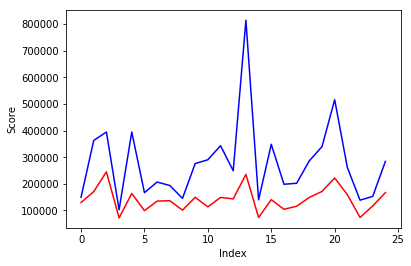

In [83]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes, y_pred_normalized,color='red')
plt.plot(indexes,Y_reg,color='blue')
plt.ylabel('Score')
plt.xlabel('Index')
plt.show()